In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


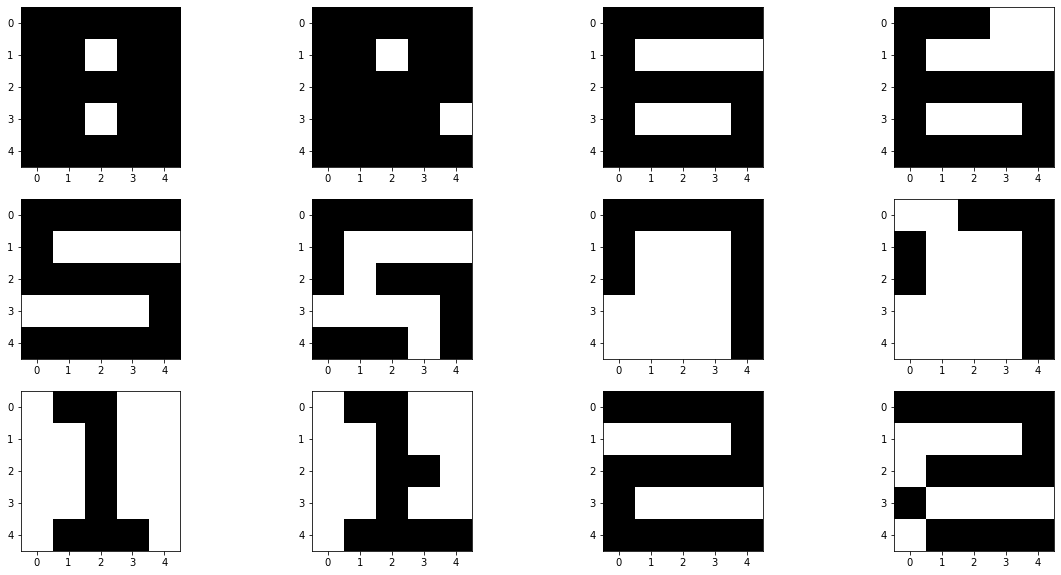

In [2]:
from numpy.matrixlib.defmatrix import matrix
import pandas as pd
import numpy as np
import math
import random
#データをもってくる
data = pd.read_csv('/content/gdrive/MyDrive/Intelligence_kadai1/Number.csv',header = None)
data1 = data.to_numpy()

#対角成分を0にする関数
def make_zero(X):
  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      if i == j :     #対角成分0
        X[i][j] = 0
  
  return X

#ノイズを加える関数
def noise(X,n):
  list = []
  for j in range(25): 
   list.append(j)  #ノイズを加えるニューロンの候補
  Y = X.copy()
  for i in range(n):
    a = random.choice(list) #ノイズを加えるニューロンをランダムで選ぶ
    Y[a][0] = X[a][0] * (-1) #値を反転
    list.remove(a)           #一回ノイズを加えたニューロンは二度はノイズを加えない
  return Y

#想起の関数
def associate(X,Y):
  a = random.randint(0,24) #想起するニューロンをランダムで選ぶ
  u = np.dot(X[a:a+1],Y)
  if u[0][0] >= theta : #閾値以上の場合は1
    Y[a][0] = 1
  else:                 #閾値より小さい場合は-1
    Y[a][0] = -1
  return Y

#エネルギー関数
def energy(X,Y):
  sum1 = 0
  sum2 = 0
  for i in range(X.shape[0]):
    sum2 += theta*Y[i][0]
    for j in range(X.shape[1]):
      sum1 += X[i][j]*Y[i][0]*Y[j][0]
  
  return -sum1/2.0 + sum2 

#類似度を求める関数
def similar(X,Y):
  Z = X - Y
  s = 0
  for i in range(Z.shape[0]):
    if Z[i][0] != 0:  #XとYの要素が異なっている場合
      s += 1         #XとYの異なっている要素の数をカウント
  return (Z.shape[0] - s)/Z.shape[0]
  
#元画像を入れるための列ベクトル
Vec8 = np.empty((25, 1))
Vec6 = np.empty((25, 1))
Vec5 = np.empty((25, 1))
Vec7 = np.empty((25, 1))
Vec1 = np.empty((25, 1))
Vec2 = np.empty((25, 1))

for i in range(5):
  for j in range(5):
    Vec8[i*5+j][0] = data1[i][j]
    Vec6[i*5+j][0] = data1[i][j+6]
    Vec5[i*5+j][0] = data1[i][j+12]
    Vec7[i*5+j][0] = data1[i][j+18]
    Vec1[i*5+j][0] = data1[i][j+24]
    Vec2[i*5+j][0] = data1[i][j+30]

mul8 = np.dot(Vec8,Vec8.T)
mul6 = np.dot(Vec6,Vec6.T)
mul5 = np.dot(Vec5,Vec5.T)
mul7 = np.dot(Vec7,Vec7.T)
mul1 = np.dot(Vec1,Vec1.T)
mul2 = np.dot(Vec2,Vec2.T)

#画像を記憶させる
W1_8 = mul8
W2_8 = (mul8 + mul6)/2.0 
W3_8 = (mul8 + mul6 + mul5)/3.0
W4_8 = (mul8 + mul6 + mul5 + mul7)/4.0
W5_8 = (mul8 + mul6 + mul5 + mul7 + mul1)/5.0
W6_8 = (mul8 + mul6 + mul5 + mul7 + mul1 + mul2)/6.0
#重みの対角成分を0にする
W1_8 = make_zero(W1_8)
W2_8 = make_zero(W2_8)
W3_8 = make_zero(W3_8)
W4_8 = make_zero(W4_8)
W5_8 = make_zero(W5_8)
W6_8 = make_zero(W6_8)

#元画像に8%のノイズを加える。25個のニューロン中2個だけ値を反転する。
Vec8_noise = noise(Vec8,2)
Vec6_noise = noise(Vec6,2)
Vec5_noise = noise(Vec5,2)
Vec7_noise = noise(Vec7,2)
Vec1_noise = noise(Vec1,2)
Vec2_noise = noise(Vec2,2)

#8%のノイズを加えた値をコピー
Vec8_noise_cp = Vec8_noise.copy()
Vec6_noise_cp = Vec6_noise.copy()
Vec5_noise_cp = Vec5_noise.copy()
Vec7_noise_cp = Vec7_noise.copy()
Vec1_noise_cp = Vec1_noise.copy()
Vec2_noise_cp = Vec2_noise.copy()

#記憶させた画像を表示するための処理
number8 = np.empty((5, 5))
number6 = np.empty((5, 5))
number5 = np.empty((5, 5))
number7 = np.empty((5, 5))
number1 = np.empty((5, 5))
number2 = np.empty((5, 5))

for i in range(5):
  for j in range(5): 
    number8[i][j] = data1[i][j]
    number6[i][j] = data1[i][j+6]
    number5[i][j] = data1[i][j+12]
    number7[i][j] = data1[i][j+18]
    number1[i][j] = data1[i][j+24]
    number2[i][j] = data1[i][j+30]

#ノイズを入れた画像を表示するための処理
number8_noise = np.empty((5, 5))
number6_noise = np.empty((5, 5))
number5_noise = np.empty((5, 5))
number7_noise = np.empty((5, 5))
number1_noise = np.empty((5, 5))
number2_noise = np.empty((5, 5))

for i in range(5):
  for j in range(5): 
    number8_noise[i][j] = Vec8_noise_cp[i*5+j][0]
    number6_noise[i][j] = Vec6_noise_cp[i*5+j][0]
    number5_noise[i][j] = Vec5_noise_cp[i*5+j][0]
    number7_noise[i][j] = Vec7_noise_cp[i*5+j][0]
    number1_noise[i][j] = Vec1_noise_cp[i*5+j][0]
    number2_noise[i][j] = Vec2_noise_cp[i*5+j][0]

#二値画像を表示
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(3, 4, 1)
ax2 = fig.add_subplot(3, 4, 2)
ax3 = fig.add_subplot(3, 4, 3)
ax4 = fig.add_subplot(3, 4, 4)
ax5 = fig.add_subplot(3, 4, 5)
ax6 = fig.add_subplot(3, 4, 6)
ax7 = fig.add_subplot(3, 4, 7)
ax8 = fig.add_subplot(3, 4, 8)
ax9 = fig.add_subplot(3, 4, 9)
ax10 = fig.add_subplot(3, 4, 10)
ax11 = fig.add_subplot(3, 4, 11)
ax12 = fig.add_subplot(3, 4, 12)
ax1.imshow(-number8,cmap = 'gray')
ax2.imshow(-number8_noise,cmap = 'gray')
ax3.imshow(-number6,cmap = 'gray')
ax4.imshow(-number6_noise,cmap = 'gray')
ax5.imshow(-number5,cmap = 'gray')
ax6.imshow(-number5_noise,cmap = 'gray')
ax7.imshow(-number7,cmap = 'gray')
ax8.imshow(-number7_noise,cmap = 'gray')
ax9.imshow(-number1,cmap = 'gray')
ax10.imshow(-number1_noise,cmap = 'gray')
ax11.imshow(-number2,cmap = 'gray')
ax12.imshow(-number2_noise,cmap = 'gray')

max_theta_acc_8=-5
max_theta_acc_6=-3
max_theta_acc_5=1
max_theta_acc_7=2
max_theta_acc_1=-1
max_theta_acc_2=4
max_theta_sim_8=-5
max_theta_sim_6=-3
max_theta_sim_5=1
max_theta_sim_7=2
max_theta_sim_1=-1
max_theta_sim_2=-4


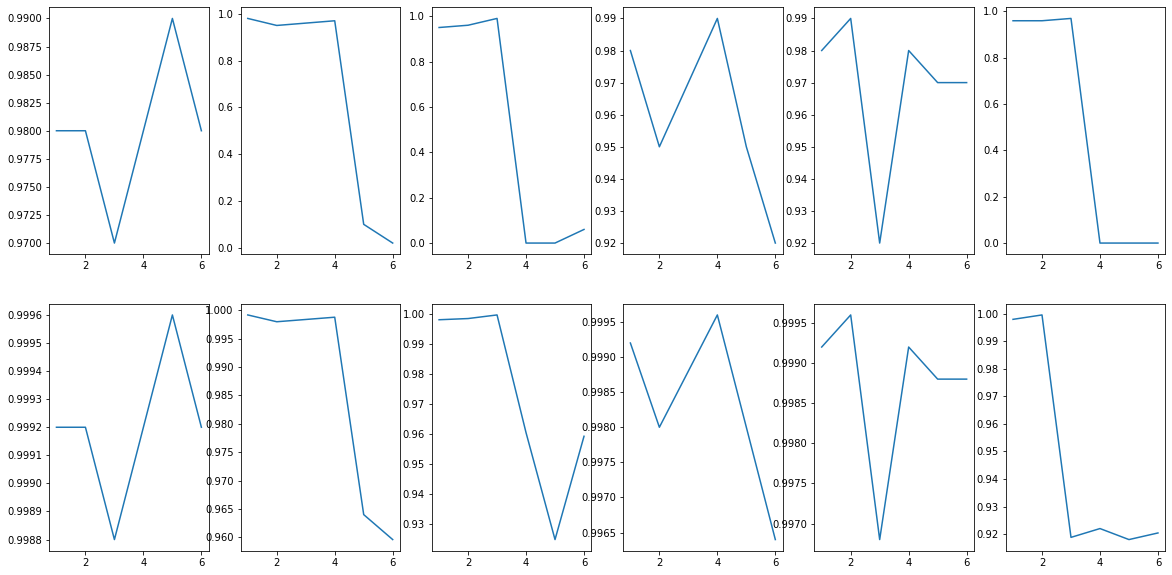

In [3]:
count = 100                            #試行回数
aso = 100                              #想起回数
max = 20                               #変化させるthetaの上限
min = -20                              #変化させるthetaの下限
simi = np.empty((6,count))             #類似度を格納するための行列
similarity = np.empty((max - min,7))   #thetaごとの類似度を格納
sum = np.zeros((1,6))                  #正答数を格納するための行列
acc = np.empty((max - min,7))          #thetaごとの正答数を格納

##8の画像の想起性能を調べる
for theta in range(min,max):
  similarity[theta-min][0] = theta
  acc[theta-min][0] = theta
  #想起(1種類)
  for i in range(count):
    Vec8_noise = Vec8_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):              
      associate(W1_8,Vec8_noise)       
    simi[0][i] = similar(Vec8,Vec8_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec8 - Vec8_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][0] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][1] = np.mean(simi[0:1]) #類似度
  acc[theta-min][1] = sum[0][0]/count           #正答率

  #2種類
  for i in range(count):
    Vec8_noise = Vec8_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W2_8,Vec8_noise)
    simi[1][i] = similar(Vec8,Vec8_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec8 - Vec8_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][1] += 1                                   #想起した画像が記憶画像8と一致した回数
                        
  similarity[theta-min][2] = np.mean(simi[1:2]) #類似度
  acc[theta-min][2] = sum[0][1]/count           #正答率

  #3種類
  for i in range(count):
    Vec8_noise = Vec8_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W3_8,Vec8_noise)
         
    simi[2][i] = similar(Vec8,Vec8_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec8 - Vec8_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][2] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][3] = np.mean(simi[2:3]) #類似度
  acc[theta-min][3] = sum[0][2]/count           #正答率

  #4種類
  for i in range(count):
    Vec8_noise = Vec8_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W4_8,Vec8_noise)       
    simi[3][i] = similar(Vec8,Vec8_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec8 - Vec8_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][3] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][4] = np.mean(simi[3:4]) #類似度
  acc[theta-min][4] = sum[0][3]/count           #正答率

  #5種類
  for i in range(count):
    Vec8_noise = Vec8_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W5_8,Vec8_noise)    
    simi[4][i] = similar(Vec8,Vec8_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec8 - Vec8_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][4] += 1                                   #想起した画像が記憶画像8と一致した回数
  
  similarity[theta-min][5] = np.mean(simi[4:5]) #類似度
  acc[theta-min][5] = sum[0][4]/count           #正答率

  #6種類
  for i in range(count):
    Vec8_noise = Vec8_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W6_8,Vec8_noise)    
    simi[5][i] = similar(Vec8,Vec8_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec8 - Vec8_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][5] += 1                                   #想起した画像が記憶画像8と一致した回数
  
  similarity[theta-min][6] = np.mean(simi[5:6]) #類似度
  acc[theta-min][6] = sum[0][5]/count           #正答率
  simi = np.empty((6,count))                    #simiを初期化
  sum = np.zeros((1,6))                         #sumを初期化

max_ind_acc_8 = np.argmax(np.mean(acc[:,1:],axis = 1))          #1-6種類の正答率の平均値が最大となるときのインデックス
max_ind_sim_8 = np.argmax(np.mean(similarity[:,1:],axis = 1))   #1-6種類の類似度の平均値が最大となるときのインデックス
max_theta_acc_8 = min + max_ind_acc_8                           #1-6種類の正答率の平均値が最大となるときのtheta
max_theta_sim_8 = min + max_ind_sim_8                           #1-6種類の類似度の平均値が最大となるときのtheta

types = []       #記憶させた画像の種類数を格納
acc_type8 = []
sim_type8 = []

for i in range(6):
  types.append(i+1)
  acc_type8.append(acc[max_ind_acc_8][i+1])         #正答率平均が最大となるときの値を格納
  sim_type8.append(similarity[max_ind_sim_8][i+1])  #類似度平均が最大となるときの値を格納

acc = np.empty((max - min,7))             #accを初期化
similarity = np.empty((max - min,7))      #similarityを初期化

##6の画像の想起性能を調べる
#画像を記憶させる
W1_6 = mul6
W2_6 = (mul6 + mul5)/2.0 
W3_6 = (mul6 + mul5 + mul7)/3.0
W4_6 = (mul6 + mul5 + mul7 + mul1)/4.0
W5_6 = (mul6 + mul5 + mul7 + mul1 + mul2)/5.0
W6_6 = (mul6 + mul5 + mul7 + mul1 + mul2 + mul8)/6.0
#重みの対角成分を0にする
W1_6 = make_zero(W1_6)
W2_6 = make_zero(W2_6)
W3_6 = make_zero(W3_6)
W4_6 = make_zero(W4_6)
W5_6 = make_zero(W5_6)
W6_6 = make_zero(W6_6)

#6の画像を想起
for theta in range(min,max):
  similarity[theta-min][0] = theta
  acc[theta-min][0] = theta
  #想起(1種類)
  for i in range(count):
    Vec6_noise = Vec6_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):              
      associate(W1_6,Vec6_noise)       
    simi[0][i] = similar(Vec6,Vec6_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec6 - Vec6_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][0] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][1] = np.mean(simi[0:1]) #類似度
  acc[theta-min][1] = sum[0][0]/count           #正答率

  #2種類
  for i in range(count):
    Vec6_noise = Vec6_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W2_6,Vec6_noise)
    simi[1][i] = similar(Vec6,Vec6_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec6 - Vec6_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][1] += 1                                   #想起した画像が記憶画像8と一致した回数
                        
  similarity[theta-min][2] = np.mean(simi[1:2]) #類似度
  acc[theta-min][2] = sum[0][1]/count           #正答率

  #3種類
  for i in range(count):
    Vec6_noise = Vec6_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W3_6,Vec6_noise)
         
    simi[2][i] = similar(Vec6,Vec6_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec6 - Vec6_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][2] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][3] = np.mean(simi[2:3]) #類似度
  acc[theta-min][3] = sum[0][2]/count           #正答率

  #4種類
  for i in range(count):
    Vec6_noise = Vec6_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W4_6,Vec6_noise)       
    simi[3][i] = similar(Vec6,Vec6_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec6 - Vec6_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][3] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][4] = np.mean(simi[3:4]) #類似度
  acc[theta-min][4] = sum[0][3]/count           #正答率

  #5種類
  for i in range(count):
    Vec6_noise = Vec6_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W5_6,Vec6_noise)    
    simi[4][i] = similar(Vec6,Vec6_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec6 - Vec6_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][4] += 1                                   #想起した画像が記憶画像8と一致した回数
  
  similarity[theta-min][5] = np.mean(simi[4:5]) #類似度
  acc[theta-min][5] = sum[0][4]/count           #正答率

  #6種類
  for i in range(count):
    Vec6_noise = Vec6_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W6_6,Vec6_noise)    
    simi[5][i] = similar(Vec6,Vec6_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec6 - Vec6_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][5] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][6] = np.mean(simi[5:6]) #類似度
  acc[theta-min][6] = sum[0][5]/count           #正答率
  simi = np.empty((6,count))                    #simiを初期化
  sum = np.zeros((1,6))                         #sumを初期化

max_ind_acc_6 = np.argmax(np.mean(acc[:,1:],axis = 1))          #1-6種類の正答率の平均値が最大となるときのインデックス
max_ind_sim_6 = np.argmax(np.mean(similarity[:,1:],axis = 1))   #1-6種類の類似度の平均値が最大となるときのインデックス
max_theta_acc_6 = min + max_ind_acc_6                           #1-6種類の正答率の平均値が最大となるときのtheta
max_theta_sim_6 = min + max_ind_sim_6                           #1-6種類の類似度の平均値が最大となるときのtheta

acc_type6 = []
sim_type6 = []

for i in range(6):
  acc_type6.append(acc[max_ind_acc_6][i+1])                #正答率平均が最大となるときの値を格納
  sim_type6.append(similarity[max_ind_sim_6][i+1])         #類似度平均が最大となるときの値を格納

acc = np.empty((max - min,7))          #accを初期化
similarity = np.empty((max - min,7))   #similarityを初期化

##5の画像の想起性能を調べる
#画像を記憶させる
W1_5 = mul5
W2_5 = (mul5 + mul7)/2.0 
W3_5 = (mul5 + mul7 + mul1)/3.0
W4_5 = (mul5 + mul7 + mul1 + mul2)/4.0
W5_5 = (mul5 + mul7 + mul1 + mul2 + mul8)/5.0
W6_5 = (mul5 + mul7 + mul1 + mul2 + mul8 + mul6)/6.0
#重みの対角成分を0にする
W1_5 = make_zero(W1_5)
W2_5 = make_zero(W2_5)
W3_5 = make_zero(W3_5)
W4_5 = make_zero(W4_5)
W5_5 = make_zero(W5_5)
W6_5 = make_zero(W6_5)

#5の画像を想起
for theta in range(min,max):
  similarity[theta-min][0] = theta
  acc[theta-min][0] = theta
  #想起(1種類)
  for i in range(count):
    Vec5_noise = Vec5_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):              
      associate(W1_5,Vec5_noise)       
    simi[0][i] = similar(Vec5,Vec5_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec5 - Vec5_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][0] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][1] = np.mean(simi[0:1]) #類似度
  acc[theta-min][1] = sum[0][0]/count           #正答率

  #2種類
  for i in range(count):
    Vec5_noise = Vec5_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W2_5,Vec5_noise)
    simi[1][i] = similar(Vec5,Vec5_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec5 - Vec5_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][1] += 1                                   #想起した画像が記憶画像8と一致した回数
                        
  similarity[theta-min][2] = np.mean(simi[1:2]) #類似度
  acc[theta-min][2] = sum[0][1]/count           #正答率

  #3種類
  for i in range(count):
    Vec5_noise = Vec5_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W3_5,Vec5_noise)
         
    simi[2][i] = similar(Vec5,Vec5_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec5 - Vec5_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][2] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][3] = np.mean(simi[2:3]) #類似度
  acc[theta-min][3] = sum[0][2]/count           #正答率

  #4種類
  for i in range(count):
    Vec5_noise = Vec5_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W4_5,Vec5_noise)       
    simi[3][i] = similar(Vec5,Vec5_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec5 - Vec5_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][3] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][4] = np.mean(simi[3:4]) #類似度
  acc[theta-min][4] = sum[0][4]/count           #正答率 

  #5種類
  for i in range(count):
    Vec5_noise = Vec5_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W5_5,Vec5_noise)    
    simi[4][i] = similar(Vec5,Vec5_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec5 - Vec5_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][4] += 1                                   #想起した画像が記憶画像8と一致した回数
  
  similarity[theta-min][5] = np.mean(simi[4:5]) #類似度
  acc[theta-min][5] = sum[0][5]/count           #正答率

  #6種類
  for i in range(count):
    Vec5_noise = Vec5_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W6_5,Vec5_noise)    
    simi[5][i] = similar(Vec5,Vec5_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec5 - Vec5_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][5] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][6] = np.mean(simi[5:6]) #類似度
  acc[theta-min][6] = sum[0][5]/count           #正答率
  simi = np.empty((6,count))                    #simiを初期化
  sum = np.zeros((1,6))                         #sumを初期化

max_ind_acc_5 = np.argmax(np.mean(acc[:,1:],axis = 1))          #1-6種類の正答率の平均値が最大となるときのインデックス
max_ind_sim_5 = np.argmax(np.mean(similarity[:,1:],axis = 1))   #1-6種類の類似度の平均値が最大となるときのインデックス
max_theta_acc_5 = min + max_ind_acc_5                           #1-6種類の正答率の平均値が最大となるときのtheta
max_theta_sim_5 = min + max_ind_sim_5                           #1-6種類の類似度の平均値が最大となるときのtheta

acc_type5 = []
sim_type5 = []

for i in range(6):
  acc_type5.append(acc[max_ind_acc_5][i+1])                #正答率平均が最大となるときの値を格納
  sim_type5.append(similarity[max_ind_sim_5][i+1])         #類似度平均が最大となるときの値を格納

acc = np.empty((max - min,7))          #accを初期化
similarity = np.empty((max - min,7))   #similarityを初期化

##7の画像の想起性能を調べる
#画像を記憶させる
W1_7 = mul7
W2_7 = (mul7 + mul1)/2.0 
W3_7 = (mul7 + mul1 + mul2)/3.0
W4_7 = (mul7 + mul1 + mul2 + mul8)/4.0
W5_7 = (mul7 + mul1 + mul2 + mul8 + mul6)/5.0
W6_7 = (mul7 + mul1 + mul2 + mul8 + mul6 + mul5)/6.0
#重みの対角成分を0にする
W1_7 = make_zero(W1_7)
W2_7 = make_zero(W2_7)
W3_7 = make_zero(W3_7)
W4_7 = make_zero(W4_7)
W5_7 = make_zero(W5_7)
W6_7 = make_zero(W6_7)

#7の画像を想起
for theta in range(min,max):
  similarity[theta-min][0] = theta
  acc[theta-min][0] = theta
  #想起(1種類)
  for i in range(count):
    Vec7_noise = Vec7_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):              
      associate(W1_7,Vec7_noise)       
    simi[0][i] = similar(Vec7,Vec7_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec7 - Vec7_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][0] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][1] = np.mean(simi[0:1]) #類似度
  acc[theta-min][1] = sum[0][0]/count           #正答率

  #2種類
  for i in range(count):
    Vec7_noise = Vec7_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W2_7,Vec7_noise)
    simi[1][i] = similar(Vec7,Vec7_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec7 - Vec7_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][1] += 1                                   #想起した画像が記憶画像8と一致した回数
                        
  similarity[theta-min][2] = np.mean(simi[1:2]) #類似度
  acc[theta-min][2] = sum[0][1]/count           #正答率

  #3種類
  for i in range(count):
    Vec7_noise = Vec7_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W3_7,Vec7_noise)
         
    simi[2][i] = similar(Vec7,Vec7_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec7 - Vec7_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][2] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][3] = np.mean(simi[2:3]) #類似度
  acc[theta-min][3] = sum[0][2]/count           #正答率

  #4種類
  for i in range(count):
    Vec7_noise = Vec7_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W4_7,Vec7_noise)       
    simi[3][i] = similar(Vec7,Vec7_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec7 - Vec7_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][3] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][4] = np.mean(simi[3:4]) #類似度
  acc[theta-min][4] = sum[0][3]/count           #正答率

  #5種類
  for i in range(count):
    Vec7_noise = Vec7_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W5_7,Vec7_noise)    
    simi[4][i] = similar(Vec7,Vec7_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec7 - Vec7_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][4] += 1                                   #想起した画像が記憶画像8と一致した回数
  
  similarity[theta-min][5] = np.mean(simi[4:5]) #類似度
  acc[theta-min][5] = sum[0][4]/count           #正答率

  #6種類
  for i in range(count):
    Vec7_noise = Vec7_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W6_7,Vec7_noise)    
    simi[5][i] = similar(Vec7,Vec7_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec7 - Vec7_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][5] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][6] = np.mean(simi[5:6]) #類似度
  acc[theta-min][6] = sum[0][5]/count           #正答率
  simi = np.empty((6,count))                    #simiを初期化
  sum = np.zeros((1,6))                         #sumを初期化

max_ind_acc_7 = np.argmax(np.mean(acc[:,1:],axis = 1))          #1-6種類の正答率の平均値が最大となるときのインデックス
max_ind_sim_7 = np.argmax(np.mean(similarity[:,1:],axis = 1))   #1-6種類の類似度の平均値が最大となるときのインデックス
max_theta_acc_7 = min + max_ind_acc_7                           #1-6種類の正答率の平均値が最大となるときのtheta
max_theta_sim_7 = min + max_ind_sim_7                           #1-6種類の類似度の平均値が最大となるときのtheta

acc_type7 = []
sim_type7 = []

for i in range(6):
  acc_type7.append(acc[max_ind_acc_7][i+1])                #正答率平均が最大となるときの値を格納
  sim_type7.append(similarity[max_ind_sim_7][i+1])         #類似度平均が最大となるときの値を格納

acc = np.empty((max - min,7))          #accを初期化
similarity = np.empty((max - min,7))   #similarityを初期化

##1の画像の想起性能を調べる
#画像を記憶させる
W1_1 = mul1
W2_1 = (mul1 + mul2)/2.0 
W3_1 = (mul1 + mul2 + mul8)/3.0
W4_1 = (mul1 + mul2 + mul8 + mul6)/4.0
W5_1 = (mul1 + mul2 + mul8 + mul6 + mul5)/5.0
W6_1 = (mul1 + mul2 + mul8 + mul6 + mul5 + mul7)/6.0
#重みの対角成分を0にする
W1_1 = make_zero(W1_1)
W2_1 = make_zero(W2_1)
W3_1 = make_zero(W3_1)
W4_1 = make_zero(W4_1)
W5_1 = make_zero(W5_1)
W6_1 = make_zero(W6_1)

#1の画像を想起
for theta in range(min,max):
  similarity[theta-min][0] = theta
  acc[theta-min][0] = theta
  #想起(1種類)
  for i in range(count):
    Vec1_noise = Vec1_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):              
      associate(W1_1,Vec1_noise)       
    simi[0][i] = similar(Vec1,Vec1_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec1 - Vec1_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][0] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][1] = np.mean(simi[0:1]) #類似度
  acc[theta-min][1] = sum[0][0]/count           #正答率

  #2種類
  for i in range(count):
    Vec1_noise = Vec1_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W2_1,Vec1_noise)
    simi[1][i] = similar(Vec1,Vec1_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec1 - Vec1_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][1] += 1                                   #想起した画像が記憶画像8と一致した回数
                        
  similarity[theta-min][2] = np.mean(simi[1:2]) #類似度
  acc[theta-min][2] = sum[0][1]/count           #正答率

  #3種類
  for i in range(count):
    Vec1_noise = Vec1_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W3_1,Vec1_noise)
         
    simi[2][i] = similar(Vec1,Vec1_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec1 - Vec1_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][2] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][3] = np.mean(simi[2:3]) #類似度
  acc[theta-min][3] = sum[0][2]/count           #正答率

  #4種類
  for i in range(count):
    Vec1_noise = Vec1_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W4_1,Vec1_noise)       
    simi[3][i] = similar(Vec1,Vec1_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec1 - Vec1_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][3] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][4] = np.mean(simi[3:4]) #類似度
  acc[theta-min][4] = sum[0][3]/count           #正答率

  #5種類
  for i in range(count):
    Vec1_noise = Vec1_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W5_1,Vec1_noise)    
    simi[4][i] = similar(Vec1,Vec1_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec1 - Vec1_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][4] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][5] = np.mean(simi[4:5]) #類似度
  acc[theta-min][5] = sum[0][4]/count           #正答率

  #6種類
  for i in range(count):
    Vec1_noise = Vec1_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W6_1,Vec1_noise)    
    simi[5][i] = similar(Vec1,Vec1_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec1 - Vec1_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][5] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][6] = np.mean(simi[5:6]) #類似度
  acc[theta-min][6] = sum[0][5]/count           #正答率
  simi = np.empty((6,count))                    #simiを初期化
  sum = np.zeros((1,6))                         #sumを初期化

max_ind_acc_1 = np.argmax(np.mean(acc[:,1:],axis = 1))          #1-6種類の正答率の平均値が最大となるときのインデックス
max_ind_sim_1 = np.argmax(np.mean(similarity[:,1:],axis = 1))   #1-6種類の類似度の平均値が最大となるときのインデックス
max_theta_acc_1 = min + max_ind_acc_1                           #1-6種類の正答率の平均値が最大となるときのtheta
max_theta_sim_1 = min + max_ind_sim_1                           #1-6種類の類似度の平均値が最大となるときのtheta

acc_type1 = []
sim_type1 = []

for i in range(6):
  acc_type1.append(acc[max_ind_acc_1][i+1])                #正答率平均が最大となるときの値を格納
  sim_type1.append(similarity[max_ind_sim_1][i+1])         #類似度平均が最大となるときの値を格納

acc = np.empty((max - min,7))          #accを初期化
similarity = np.empty((max - min,7))   #similarityを初期化

##2の画像の想起性能を調べる
#画像を記憶させる
W1_2 = mul2
W2_2 = (mul2 + mul8)/2.0 
W3_2 = (mul2 + mul8 + mul6)/3.0
W4_2 = (mul2 + mul8 + mul6 + mul5)/4.0
W5_2 = (mul2 + mul8 + mul6 + mul5 + mul7)/5.0
W6_2 = (mul2 + mul8 + mul6 + mul5 + mul7 + mul1)/6.0
#重みの対角成分を0にする
W1_2 = make_zero(W1_2)
W2_2 = make_zero(W2_2)
W3_2 = make_zero(W3_2)
W4_2 = make_zero(W4_2)
W5_2 = make_zero(W5_2)
W6_2 = make_zero(W6_2)

#2の画像を想起
for theta in range(min,max):
  similarity[theta-min][0] = theta
  acc[theta-min][0] = theta
  #想起(1種類)
  for i in range(count):
    Vec2_noise = Vec2_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):              
      associate(W1_2,Vec2_noise)       
    simi[0][i] = similar(Vec2,Vec2_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec2 - Vec2_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][0] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][1] = np.mean(simi[0:1]) #類似度
  acc[theta-min][1] = sum[0][0]/count           #正答率

  #2種類
  for i in range(count):
    Vec2_noise = Vec2_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W2_2,Vec2_noise)
    simi[1][i] = similar(Vec2,Vec2_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec2 - Vec2_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][1] += 1                                   #想起した画像が記憶画像8と一致した回数
                        
  similarity[theta-min][2] = np.mean(simi[1:2]) #類似度
  acc[theta-min][2] = sum[0][1]/count           #正答率

  #3種類
  for i in range(count):
    Vec2_noise = Vec2_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W3_2,Vec2_noise)
         
    simi[2][i] = similar(Vec2,Vec2_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec2 - Vec2_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][2] += 1                                   #想起した画像が記憶画像8と一致した回数
 
  similarity[theta-min][3] = np.mean(simi[2:3]) #類似度
  acc[theta-min][3] = sum[0][2]/count           #正答率

  #4種類
  for i in range(count):
    Vec2_noise = Vec2_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W4_2,Vec2_noise)       
    simi[3][i] = similar(Vec2,Vec2_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec2 - Vec2_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][3] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][4] = np.mean(simi[3:4]) #類似度
  acc[theta-min][4] = sum[0][3]/count           #正答率

  #5種類
  for i in range(count):
    Vec2_noise = Vec2_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W5_2,Vec2_noise)    
    simi[4][i] = similar(Vec2,Vec2_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec2 - Vec2_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][4] += 1                                   #想起した画像が記憶画像8と一致した回数
  
  similarity[theta-min][5] = np.mean(simi[4:5]) #類似度
  acc[theta-min][5] = sum[0][4]/count           #正答率

  #6種類
  for i in range(count):
    Vec2_noise = Vec2_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso):             
      associate(W6_2,Vec2_noise)    
    simi[5][i] = similar(Vec2,Vec2_noise)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec2 - Vec2_noise)) == 0:      #二乗ノルムがゼロ
      sum[0][5] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity[theta-min][6] = np.mean(simi[5:6]) #類似度
  acc[theta-min][6] = sum[0][5]/count           #正答率
  simi = np.empty((6,count))                    #simiを初期化
  sum = np.zeros((1,6))                         #sumを初期化

max_ind_acc_2 = np.argmax(np.mean(acc[:,1:],axis = 1))          #1-6種類の正答率の平均値が最大となるときのインデックス
max_ind_sim_2 = np.argmax(np.mean(similarity[:,1:],axis = 1))   #1-6種類の類似度の平均値が最大となるときのインデックス
max_theta_acc_2 = min + max_ind_acc_2                           #1-6種類の正答率の平均値が最大となるときのtheta
max_theta_sim_2 = min + max_ind_sim_2                           #1-6種類の類似度の平均値が最大となるときのtheta

acc_type2 = []
sim_type2 = []

for i in range(6):
  acc_type2.append(acc[max_ind_acc_2][i+1])                #正答率平均が最大となるときの値を格納
  sim_type2.append(similarity[max_ind_sim_2][i+1])         #類似度平均が最大となるときの値を格納

acc = np.empty((max - min,7))          #accを初期化
similarity = np.empty((max - min,7))   #similarityを初期化

##グラフを表示する
import matplotlib.pyplot as plt
fig3 = plt.figure(figsize=(20,10))
cx1 = fig3.add_subplot(2, 6, 1)
cx2 = fig3.add_subplot(2, 6, 2)
cx3 = fig3.add_subplot(2, 6, 3)
cx4 = fig3.add_subplot(2, 6, 4)
cx5 = fig3.add_subplot(2, 6, 5)
cx6 = fig3.add_subplot(2, 6, 6)
cx7 = fig3.add_subplot(2, 6, 7)
cx8 = fig3.add_subplot(2, 6, 8)
cx9 = fig3.add_subplot(2, 6, 9)
cx10 = fig3.add_subplot(2, 6, 10)
cx11 = fig3.add_subplot(2, 6, 11)
cx12 = fig3.add_subplot(2, 6, 12)
cx1.plot(types,acc_type8)
cx2.plot(types,acc_type6)
cx3.plot(types,acc_type5)
cx4.plot(types,acc_type7)
cx5.plot(types,acc_type1)
cx6.plot(types,acc_type2)
cx7.plot(types,sim_type8)
cx8.plot(types,sim_type6)
cx9.plot(types,sim_type5)
cx10.plot(types,sim_type7)
cx11.plot(types,sim_type1)
cx12.plot(types,sim_type2)
print("max_theta_acc_8={}".format(max_theta_acc_8))
print("max_theta_acc_6={}".format(max_theta_acc_6))
print("max_theta_acc_5={}".format(max_theta_acc_5))
print("max_theta_acc_7={}".format(max_theta_acc_7))
print("max_theta_acc_1={}".format(max_theta_acc_1))
print("max_theta_acc_2={}".format(max_theta_acc_2))
print("max_theta_sim_8={}".format(max_theta_sim_8))
print("max_theta_sim_6={}".format(max_theta_sim_6))
print("max_theta_sim_5={}".format(max_theta_sim_5))
print("max_theta_sim_7={}".format(max_theta_sim_7))
print("max_theta_sim_1={}".format(max_theta_sim_1))
print("max_theta_sim_2={}".format(max_theta_sim_2))
plt.show()

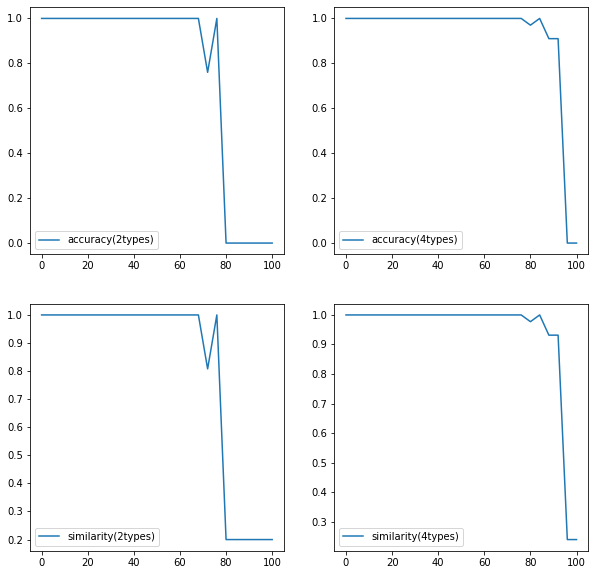

In [4]:
#画像が2種類と4種類の場合にノイズを0%から100%まで増やして想起性能を調べる。

mat_noise = np.empty((26,25))
for i in range(26):
  mat_noise[i:i + 1] = noise(Vec8,i).T   #8の画像に0-100%のノイズを加えたものを格納する。実際には値を反転するニューロンの数を0-25個まで1個ずつ変化させた。
  #print(mat_noise[i:i + 1])

mat_noise_cp = mat_noise.copy()          #8の画像にノイズを加えたものをコピー。
#print(mat_noise_cp)

count_2 = 100                    #試行回数
aso_2 = 1000                      #想起回数
simi_2 = np.empty((2,count_2))   #類似度を格納するための行列
similarity_2 = []                #ノイズごとの類似度を格納（2種類）
sum_2 = np.zeros((1,2))          #正答数を格納するための行列
acc_2 = []                       #ノイズごとの正答数を格納（2種類）
similarity_3 = []                #ノイズごとの類似度を格納（4種類）
acc_3 = []                       #ノイズごとの正答数を格納（4種類）

#2種類
for noi in range(26):
  theta = -10
  for i in range(count_2):
    mat_noise = mat_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso_2):              
      associate(W2_8,mat_noise[noi:noi + 1].T)      #想起
    simi_2[0][i] = similar(Vec8,mat_noise[noi:noi + 1].T)            #想起したときの記憶画像8との類似度を格納
    #print(i)
    #print(simi_2[0][i])
    if np.sum(np.square(Vec8 - mat_noise[noi:noi + 1].T)) == 0:      #二乗ノルムがゼロ
      sum_2[0][0] += 1                                   #想起した画像が記憶画像8と一致した回数
                        
  similarity_2.append(np.mean(simi_2[0:1])) #類似度
  acc_2.append(sum_2[0][0]/count_2) #正答率

  #4種類
  for i in range(count_2):
    mat_noise = mat_noise_cp.copy() #想起する画像を想起前に初期化
    for t in range(aso_2):             
      associate(W4_8,mat_noise[noi:noi + 1].T)       
    simi_2[1][i] = similar(Vec8,mat_noise[noi:noi + 1].T)              #想起したときの記憶画像8との類似度を格納
    if np.sum(np.square(Vec8 - mat_noise[noi:noi + 1].T)) == 0:      #二乗ノルムがゼロ
      sum_2[0][1] += 1                                   #想起した画像が記憶画像8と一致した回数

  similarity_3.append(np.mean(simi_2[1:2])) #類似度
  simi_2 = np.empty((2,count_2))            #simi_2を初期化
  acc_3.append(sum_2[0][1]/count_2)         #正答率 
  sum_2 = np.zeros((1,2))                   #sum_2を初期化

import matplotlib.pyplot as plt
percent = []
for i in range(26):
  percent.append(i*4)

fig2 = plt.figure(figsize=(10,10))
bx1 = fig2.add_subplot(2, 2, 1)
bx2 = fig2.add_subplot(2, 2, 2)
bx3 = fig2.add_subplot(2, 2, 3)
bx4 = fig2.add_subplot(2, 2, 4)
l1 = "accuracy(2types)"
l2 = "accuracy(4types)"
l3 = "similarity(2types)"
l4 = "similarity(4types)"
bx1.plot(percent,acc_2,label = l1)
bx2.plot(percent,acc_3,label = l2)
bx3.plot(percent,similarity_2,label = l3)
bx4.plot(percent,similarity_3,label = l4)
bx1.legend(loc = 'lower left') 
bx2.legend(loc = 'lower left') 
bx3.legend(loc = 'lower left') 
bx4.legend(loc = 'lower left') 
plt.show()


#print(acc_2)
#print(acc_3)
#print(similarity_2)
#print(similarity_3)